<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme_cover.gif?raw=true  width='800'/>
</div>



---

<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/shanghai.png?raw=true width='400' />
</div>

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/ts_forecasting.png?raw=true width='800' />
</div>

👇👇👇点击可跳转！

[第四阶段：时间序列建模预测](#第四阶段：时间序列建模预测)

- [Univariate](#Univariate)
    - [数据处理和准备](#数据处理和准备)

<div class="alert alert-block alert-danger">
<b>注意：</b>

- 需要翻墙才可下载数据和观看油管视频哦！
- 在线看HTML显示不全，请下载到本地操作哦！
- 记得解锁代码再去run哦！
    
</div>

<div class="alert alert-block alert-warning">
<b>【上海新冠疫情数据分析】项目日志</b>

第五阶段：【时间序列建模预测】
    
第五节阶段核心目的：学习并掌握时间序列建模预测，这一期主要讲【单变量预测】
    
难度（最高5星）：⭐⭐⭐⭐

Good Luck!
</div>


# 第四阶段：时间序列建模预测

In [1]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from metrics import evaluate
import metrics

import pickle
import warnings
from math import sqrt

import lightgbm as lgb
import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import pmdarima as pm
import tensorflow as tf
import xgboost as xgb
# from bayes_opt import BayesianOptimization
# from gluonts.dataset.common import ListDataset
# from gluonts.evaluation.backtest import make_evaluation_predictions
# from gluonts.model.deepar import DeepAREstimator
# from gluonts.mx.trainer import Trainer
# from matplotlib import pyplot as plt
from sklearn import linear_model, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from rich.progress import track

# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")


# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# change text color
import colorama
from colorama import Fore, Style

print(tf.__version__)

2.0.0


In [2]:
# IPython
from IPython.display import IFrame

## 时间序列预测

这篇文章带大家来介绍，时间序列预测的常用方法，建模本身就是个比较玄学的东西，能用的模型太多了，我们其实就是在反复的实验，寻找最优。

那么单变量和多变量预测的最大区别就是：**我们是否有其他的regressors，而非仅仅是时序数据本身。**

时间序列数据：

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

横截面数据：

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

正在读取【横截面】数据......
读取完毕
正在读取【时间序列】数据......
读取完毕
正在获取并处理【上海】数据（数据来自上海卫健委）......
读取完毕


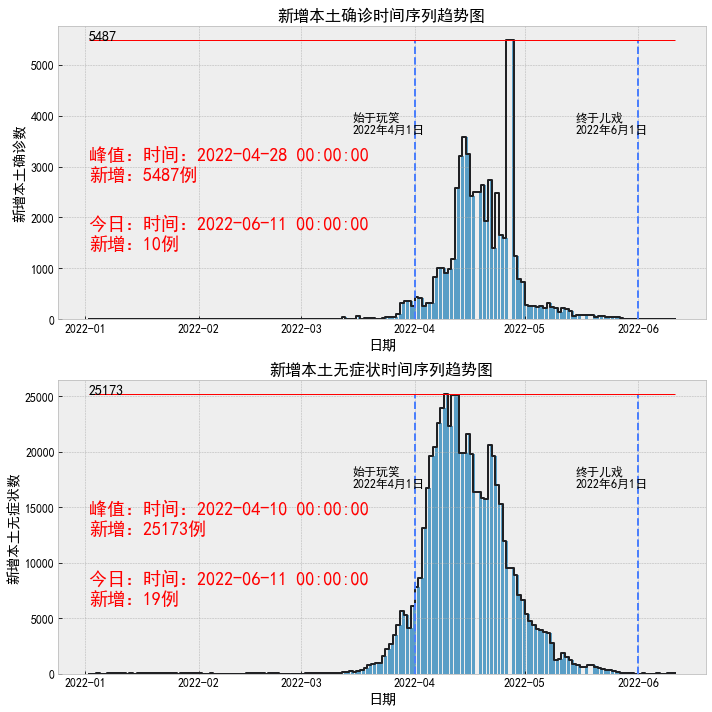

In [3]:
from getdata import GET_csse_covid_19_daily_reports,GET_csse_covid_19_time_series,GET_shanghai_data

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(plot=True)  # 这里包含近10天的上海无症状新增趋势！

In [4]:
from data_processing import ts_process_CHINA,ts_process_US,daily_process

In [5]:
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = ts_process_CHINA(ts_confirmed_global,clip=False)
ts_deaths_CHINA_incre, _, _ = ts_process_CHINA(ts_deaths_global,clip=False)
ts_recovered_CHINA_incre, _, _ = ts_process_CHINA(ts_recovered_global,clip=False)

In [6]:
ts_confirmed_US_incre,loc_data_us,sorted_state = ts_process_US(ts_confirmed_us,clip=False)
ts_deaths_US_incre,_,_,population = ts_process_US(ts_deaths_us,death = True,clip=False)

In [7]:
latest_data_CHINA = daily_process(latest_data_global, country = 'China')
prev_data_CHINA = daily_process(prev_data_global, country = 'China')
latest_data_US = daily_process(latest_data_us, country = 'US')
prev_data_US = daily_process(prev_data_us, country = 'US')

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/sep.gif?raw=true width='800' />
</div>

## 数据处理和准备

要注意，我们不能随机split训练集和测试集，因为每个样本之间并不是独立的，不能使用

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

建议观看：
1. [什么是train test split](https://www.youtube.com/watch?v=P2NqrFp8usY)
2. [一文看懂 AI 数据集：训练集、验证集、测试集](https://easyaitech.medium.com/%E4%B8%80%E6%96%87%E7%9C%8B%E6%87%82-ai-%E6%95%B0%E6%8D%AE%E9%9B%86-%E8%AE%AD%E7%BB%83%E9%9B%86-%E9%AA%8C%E8%AF%81%E9%9B%86-%E6%B5%8B%E8%AF%95%E9%9B%86-%E9%99%84-%E5%88%86%E5%89%B2%E6%96%B9%E6%B3%95-%E4%BA%A4%E5%8F%89%E9%AA%8C%E8%AF%81-9b3afd37fd58)
3. [sklearn实现](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

<div class="alert alert-block alert-success"><b>Step 1 </b>

   
为什么不能直接用train_test_split？

</div>

In [8]:
split_date = '2022-01-01'
df_train = ts_confirmed_US_incre.loc[ts_confirmed_US_incre.index < split_date]
df_test = ts_confirmed_US_incre.loc[ts_confirmed_US_incre.index >= split_date]
print(f"{len(df_train)} days of training data \n {len(df_test)} days of testing data ")

710 days of training data 
 165 days of testing data 


In [9]:
resultsDict = {}
predictionsDict = {}

评估指标

- [R-Squared](https://www.investopedia.com/terms/r/r-squared.asp)
- [Mean Absolute Error(MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)
- [Mean Absolute Percentage Error(MAPE)](https://www.statisticshowto.com/mean-absolute-percentage-error-mape/)
- [Mean Squared Error(MSE)](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/)
- [Root Mean Squared Error(RMSE)](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/)
- [Normalized Root Mean Squared Error(NRMSE)](https://stats.stackexchange.com/questions/255276/normalized-root-mean-square-error-nrmse-with-zero-mean-of-observed-value)
- [Weighted Absolute Percentage Error(WAPE)](https://stackoverflow.com/questions/68529201/how-to-calculate-wape-for-given-dataframe-in-python)
- [Weighted Mean Absolute Percentage Error(WMAPE)](https://www.baeldung.com/cs/mape-vs-wape-vs-wmape)

这里我们计算这四个指标来作为代表：

 metrics=("mae", "rmse", "mape", "r2")

<div class="alert alert-block alert-success"><b>作业</b>

解释下面代码的每一行（comment）

</div>

In [10]:
mean = df_train['New York'].mean()
mean = np.array([mean for u in range(len(df_test))])
resultsDict['Naive mean'] = evaluate(df_test['New York'], mean)
predictionsDict['Naive mean'] = mean
resultsDict['Yesterdays value'] = evaluate(
    df_test['New York'], df_test['New York'].shift(1).fillna(0))
predictionsDict['Yesterdays value'] = df_test['New York'].shift(1).fillna(0).values

### Univariate Forecasting

- [Simple Exponential Smoothing (SES)](https://koalatea.io/python-ses-timeseries/)
- [Holt Winter’s Exponential Smoothing (HWES)](https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873)
- [Autoregression (AR)](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)
- [Moving Average (MA)](https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/)
- [Autoregressive Moving Average (ARMA)](https://www.math.pku.edu.cn/teachers/lidf/course/fts/ftsnotes/html/_ftsnotes/fts-arma.html)
- [Autoregressive integrated moving average (ARIMA)](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
- [Prophet](https://facebook.github.io/prophet/docs/quick_start.html)


#### Simple Exponential Smoothing (SES)

最简单的指数平滑方法自然被称为“简单指数平滑”(SES)。这种方法适用于预测没有明显趋势或季节因素的数据！

当预测时，我们希望吧更大的权重赋给最近的观测值（影响最大）而不是较远的观测值（lag大），这也是ses的原理，预测值使用加权平均进行计算，其中权重随时间的久远程度呈指数型下降！

$$S_t= \alpha x_t + (1-\alpha) S_{t-1}$$

$\alpha$是平滑因子，在0到1之间。

SES往往处理没有总体趋势和季节性的序列，不然平滑值将滞后于原始数据，除非$\alpha$接近1，但是这样平滑度就大大下降。

<div class="alert alert-block alert-success"><b>作业</b>

写出St的递推公式

</div>

<div class="alert alert-block alert-success"><b>作业</b>

1. 补全下面的代码
2. 把该算法的结果分别填入resultsDict（评估结果）和predictionsDict（预测的具体值）
3. 梳理该算法的核心思想和要点！
4. 下面每个算法都遵循此规则！（不重复说了）

</div>

In [12]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = "构造训练集"
    model = "构建模型"
    model_fit = "训练"
    predictions = "预测"
    yhat = yhat + [predictions]

yhat_SES = pd.concat(yhat)
resultsDict['SES'] = evaluate(df_test['New York'], yhat_SES.values)
predictionsDict['SES'] = yhat_SES.values

Output()

#### Holt Winter’s Exponential Smoothing (HWES)

指数平滑法有几种不同形式：
- 一次指数平滑法针对没有趋势和季节性的序列
- 二次指数平滑法针对有趋势但没有季节性的序列
- 三次指数平滑法针对有趋势也有季节性的序列

“Holt-Winters”有时特指三次指数平滑法。

如何解决1次的问题？引入2次指数平滑，这样能够处理趋势信息，为什么叫2次？

因为将指数平滑应用了2次，与ses相比，2次平滑加入了时间趋势统计量$b_t$，

$$
S_t = \alpha x_t + (1-\alpha)(S_{t-1}+b_{t-1}) \\
b_t = \beta(S_t-S_{t-1})+(1-\alpha)b_{t-1}
$$

那么，3次指数平滑在考虑基线和趋势的基础上（二次指数平滑），再增加一个季节分量，类似于趋势分量，对季节分量进行指数平滑，再用加法或乘法模型把分量合并。

> 季节性被定义为时间序列数据的趋势，它表现出每一个周期重复自身的行为，就像任何周期函数一样。“季节”这个词用来表示行为每隔时间段L就开始自我重复。在自然界中有不同类型的季节性“累加性”(additive)和“累乘性“(multiplicative)，就像加法和乘法是数学的基本运算。

In [13]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = "构造训练集"
    model = "构建模型"
    model_fit = "训练"
    predictions = "预测"
    yhat = yhat + [predictions]

yhat_HWES = pd.concat(yhat)
resultsDict['HWES'] = evaluate(df_test['New York'], yhat_HWES.values)
predictionsDict['HWES'] = yhat_HWES.values

Output()

#### Autoregression (AR)

在多元线性回归模型中，我们通过对多个预测变量（predictor）的线性组合预测了目标变量（variable of interest）。在自回归模型中，我们则是基于目标变量历史数据的组合对目标变量进行预测。自回归一词中的自字即表明其是对变量自身进行的回归。

因此，一个p阶的自回归模型可以表示如下：



$$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t},$$

<div class="alert alert-block alert-success"><b>作业</b>
    
在AR(1)模型下：

1. 当$\phi_{1}=0$时，$y_t$相当于什么？
2. 当$\phi_{1}=1$时，$y_t$相当于什么？
3. 当$\phi_{1}<0$时，$y_t$如何变化？

</div>

In [14]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = "构造训练集"
    model = "构建模型"
    model_fit = "训练"
    predictions = "预测"
    yhat = yhat + [predictions]

yhat_AR = pd.concat(yhat)
resultsDict['AR'] = evaluate(df_test['New York'], yhat_AR.values)
predictionsDict['AR'] = yhat_AR.values

Output()

#### Moving Average (MA)

不同于 使用预测变量的历史值来进行回归，移动平均模型（moving average model）使用历史预测误差来建立一个类似回归的模型。

$$y_{t} = c + \varepsilon_t + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q}$$

注意到$y_t$的每一个值都可以被认为是一个历史预测误差的加权移动平均值。

<div class="alert alert-block alert-success"><b>作业</b>

**请问：移动平均模型和移动平均平滑（smoothing）有什么区别？**


**请问：AR和MA的关系是什么？可以互相转换么？如果可以，怎么做？**


</div>


**请问：移动平均模型和移动平均平滑（smoothing）有什么区别？**

答案：移动平均模型是用于预测未来值的方法，而移动平均平滑法则是用来估计历史值的循环趋势。

**请问：AR和MA的关系是什么？可以互相转换么？如果可以，怎么做？**

答案：任何一个AR(p)模型其实都是可以用一个MA(∞)模型来表示的。 比如：通过重复的迭代，我们可以用这种方法表示一个AR(1)模型：

$$
\begin{align*}
y_t &= \phi_1y_{t-1} + \varepsilon_t\\
&= \phi_1(\phi_1y_{t-2} + \varepsilon_{t-1}) + \varepsilon_t\\
&= \phi_1^2y_{t-2} + \phi_1 \varepsilon_{t-1} + \varepsilon_t\\
&= \phi_1^3y_{t-3} + \phi_1^2\varepsilon_{t-2} + \phi_1 \varepsilon_{t-1} + \varepsilon_t\\
&\text{etc.}
\end{align*}
$$

In [15]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = "构造训练集"
    model = "构建模型"
    model_fit = "训练"
    predictions = "预测"
    yhat = yhat + [predictions]

yhat_MA = pd.concat(yhat)
resultsDict['MA'] = evaluate(df_test['New York'], yhat_MA.values)
predictionsDict['MA'] = yhat_MA.values

Output()

#### Autoregressive Moving Average (ARMA)


ARMA相当于把AR和MA和起来，场景是一样的，AR，MA，ARMA都是运用于原始数据是平稳的时间序列。

ARMA(p,q)中的参数对应的事AR（自回归模型）和MA（移动平均模型）的阶数。

In [16]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = "构造训练集"
    model = "构建模型"
    model_fit = "训练"
    predictions = "预测"
    yhat = yhat + [predictions]

yhat_ARMA = pd.concat(yhat)
resultsDict['ARMA'] = evaluate(df_test['New York'], yhat_ARMA.values)
predictionsDict['ARMA'] = yhat_ARMA.values

Output()

#### Autoregressive integrated moving average (ARIMA)

> 这里说的是非季节性的ARIMA

当我们将差分和自回归模型以及移动平均模型结合起来的时候，我们可以得到一个非季节性 ARIMA 模型。ARIMA 是 AutoRegressive Integrated Moving Average 的简称。（在这里Integrated指的是差分的逆过程) ARIMA模型的表示如下：


$$
\begin{equation}
  y'_{t} = c + \phi_{1}y'_{t-1} + \cdots + \phi_{p}y'_{t-p}
     + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t}
\end{equation}
$$

$y_t'$是差分序列（阶数可能大于1），这个模型称作`ARIMA(p,d,q)`模型。

- p：自回归模型阶数
- d：差分阶数
- q：移动平均模型阶数


<div class="alert alert-block alert-success"><b>作业</b>

问题：请填充下面的ARIMA对应参数情况

</div>


| 类型               | ARIMA参数情况              |
| -------------------- | ----------------------------- |
| 白噪声               | ARIMA(0,0,0)                  |
| 随机游走模型         | ARIMA(0,1,0) with no constant |
| 带漂移的随机游走模型 | ARIMA(0,1,0) with a constant  |
| 自回归模型           | ARIMA(p,0,0)                 |
| 移动平均模型         | ARIMA(0,0,q)                 |


<div class="alert alert-block alert-success"><b>作业</b>

**问题：你知道如何用acf、pacf图去判定p、d、q么？**

</div>


答案：

如果差分数据的自相关图和偏自相关图显示出如下特征，则他们可能来自于ARIMA(p,d,0)模型：

- 自相关系数呈现指数下降或者类似正弦型的波动；
- 偏自相关图中的延迟p中有明显突起，但延迟更大时不存在类似的突起。

如果差分数据的自相关图和偏自相关图数据显示出如下特征,则他们可能来自于ARIMA(0,d,q)模型：

- 偏自相关系数呈现指数下降或者类似正弦型的波动；
- 在自相关图中的延迟q中有明显突起,但延迟更大时不存在类似的突起。



In [17]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = "构造训练集"
    model = "构建模型"
    model_fit = "训练"
    predictions = "预测"
    yhat = yhat + [predictions]

yhat_ARIMA = pd.concat(yhat)
resultsDict['ARIMA'] = evaluate(df_test['New York'], yhat_ARIMA.values)
predictionsDict['ARIMA'] = yhat_ARIMA.values

Output()

#### Auto ARIMA

Auto ARIMA会在模型表现和模型复杂度之间自我平衡，其指标是AIC/BIC。

<div class="alert alert-block alert-success"><b>作业</b>

**问题：Auto ARIMA的优缺点？**

</div>

1. 节省时间
2. 模型选择壁垒低
3. 避免人为错误
4. 解释性低
5. 不清楚其他模型表现情况

![](https://miro.medium.com/max/1400/0*5eoQ-yE91Gce8lI0)

In [18]:
autoModel = pm.auto_arima(df_train['New York'], trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=True)
# autoModel.plot_diagnostics(figsize=(14,10))
# plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=13347.733, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=14640.016, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=14145.272, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=13346.430, Time=0.48 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=13363.877, Time=0.23 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=13562.254, Time=0.42 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=13364.415, Time=0.79 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=13346.874, Time=0.74 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=13433.366, Time=0.31 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=13332.877, Time=0.88 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=13340.164, Time=0.49 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=13337.682, Time=1.12 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=inf, Time=0.92 sec
 ARIMA(3,2,2)(0,0,0)[0]        

In [19]:
best_order = autoModel.order
model0 = ARIMA(df_train['New York'],order = best_order)
model_fit0 =model0.fit(disp=False)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = "构造训练集"
    model = "构建模型"
    model_fit = "训练"
    predictions = "预测"
    yhat = yhat + [predictions]
    
yhat_autoarima = pd.concat(yhat)
resultsDict['AutoARIMA {0}'.format(best_order)] = evaluate(
    df_test['New York'], yhat_autoarima)
predictionsDict['AutoARIMA {0}'.format(best_order)] = yhat_autoarima.values

Output()

#### Seasonal Autoregressive Integrated Moving-Average (SARIMA)


SARIMAX是在差分移动自回归模型（ARIMA）的基础上加上季节（S,Seasonal）和外部因素(X,eXogenous)。也就是说以ARIMA基础加上周期性和季节性，适用于时间序列中带有明显周期性和季节性特征的数据。



In [20]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = "构造训练集"
    model = "构建模型"
    model_fit = "训练"
    predictions = "预测"
    yhat = yhat + [predictions]
    
yhat_SARIMAX = pd.concat(yhat)
resultsDict['SARIMAX'] = evaluate(df_test['New York'], yhat_SARIMAX.values)
predictionsDict['SARIMAX'] = yhat_SARIMAX.values

Output()

#### Auto - SARIMA

In [21]:
# building the model
autoModel = pm.auto_arima(df_train['New York'], trace=True, error_action='ignore',
                          suppress_warnings=True, seasonal=True, m=6, stepwise=True)
# autoModel.plot_diagnostics(figsize=(14,10))
# plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[6]             : AIC=13313.882, Time=1.99 sec
 ARIMA(0,2,0)(0,0,0)[6]             : AIC=14640.016, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[6]             : AIC=14146.943, Time=0.12 sec
 ARIMA(0,2,1)(0,0,1)[6]             : AIC=inf, Time=0.59 sec
 ARIMA(2,2,2)(0,0,1)[6]             : AIC=13327.855, Time=1.51 sec
 ARIMA(2,2,2)(1,0,0)[6]             : AIC=13366.697, Time=0.53 sec
 ARIMA(2,2,2)(2,0,1)[6]             : AIC=13317.165, Time=2.75 sec
 ARIMA(2,2,2)(1,0,2)[6]             : AIC=13319.170, Time=2.98 sec
 ARIMA(2,2,2)(0,0,0)[6]             : AIC=13347.733, Time=0.47 sec
 ARIMA(2,2,2)(0,0,2)[6]             : AIC=13316.638, Time=2.19 sec
 ARIMA(2,2,2)(2,0,0)[6]             : AIC=13363.630, Time=1.18 sec
 ARIMA(2,2,2)(2,0,2)[6]             : AIC=13356.190, Time=3.70 sec
 ARIMA(1,2,2)(1,0,1)[6]             : AIC=inf, Time=1.79 sec
 ARIMA(2,2,1)(1,0,1)[6]             : AIC=13411.952, Time=1.30 sec
 ARIMA(3,2,2)(1,0,1)[6]        

In [22]:
best_order = autoModel.order
seasonalOrder = autoModel.seasonal_order
# model0 = ARIMA(df_train['New York'],order = best_order)
# model_fit0 =model0.fit(disp=False)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = "构造训练集"
    model = "构建模型"
    model_fit = "训练"
    predictions = "预测"
    yhat = yhat + [predictions]
    
yhat_AutoSARIMAX = pd.concat(yhat)
resultsDict['AutoSARIMAX  {0}'.format(best_order,seasonalOrder)] = evaluate(
    df_test['New York'], yhat_AutoSARIMAX)
predictionsDict['AutoSARIMAX  {0}'.format(best_order,seasonalOrder)] = yhat_AutoSARIMAX.values

Output()

In [23]:
yhat_dict = {
    'SES':yhat_SES,
    'HWES':yhat_HWES,
    'AR':yhat_AR,
    'MA':yhat_MA,
    'ARMA':yhat_ARMA,
    'ARIMA':yhat_ARIMA,
    'AUTOARIMA':yhat_autoarima,
    'SARIMAX':yhat_SARIMAX,
    'AUTOSARIMAX':yhat_AutoSARIMAX
}

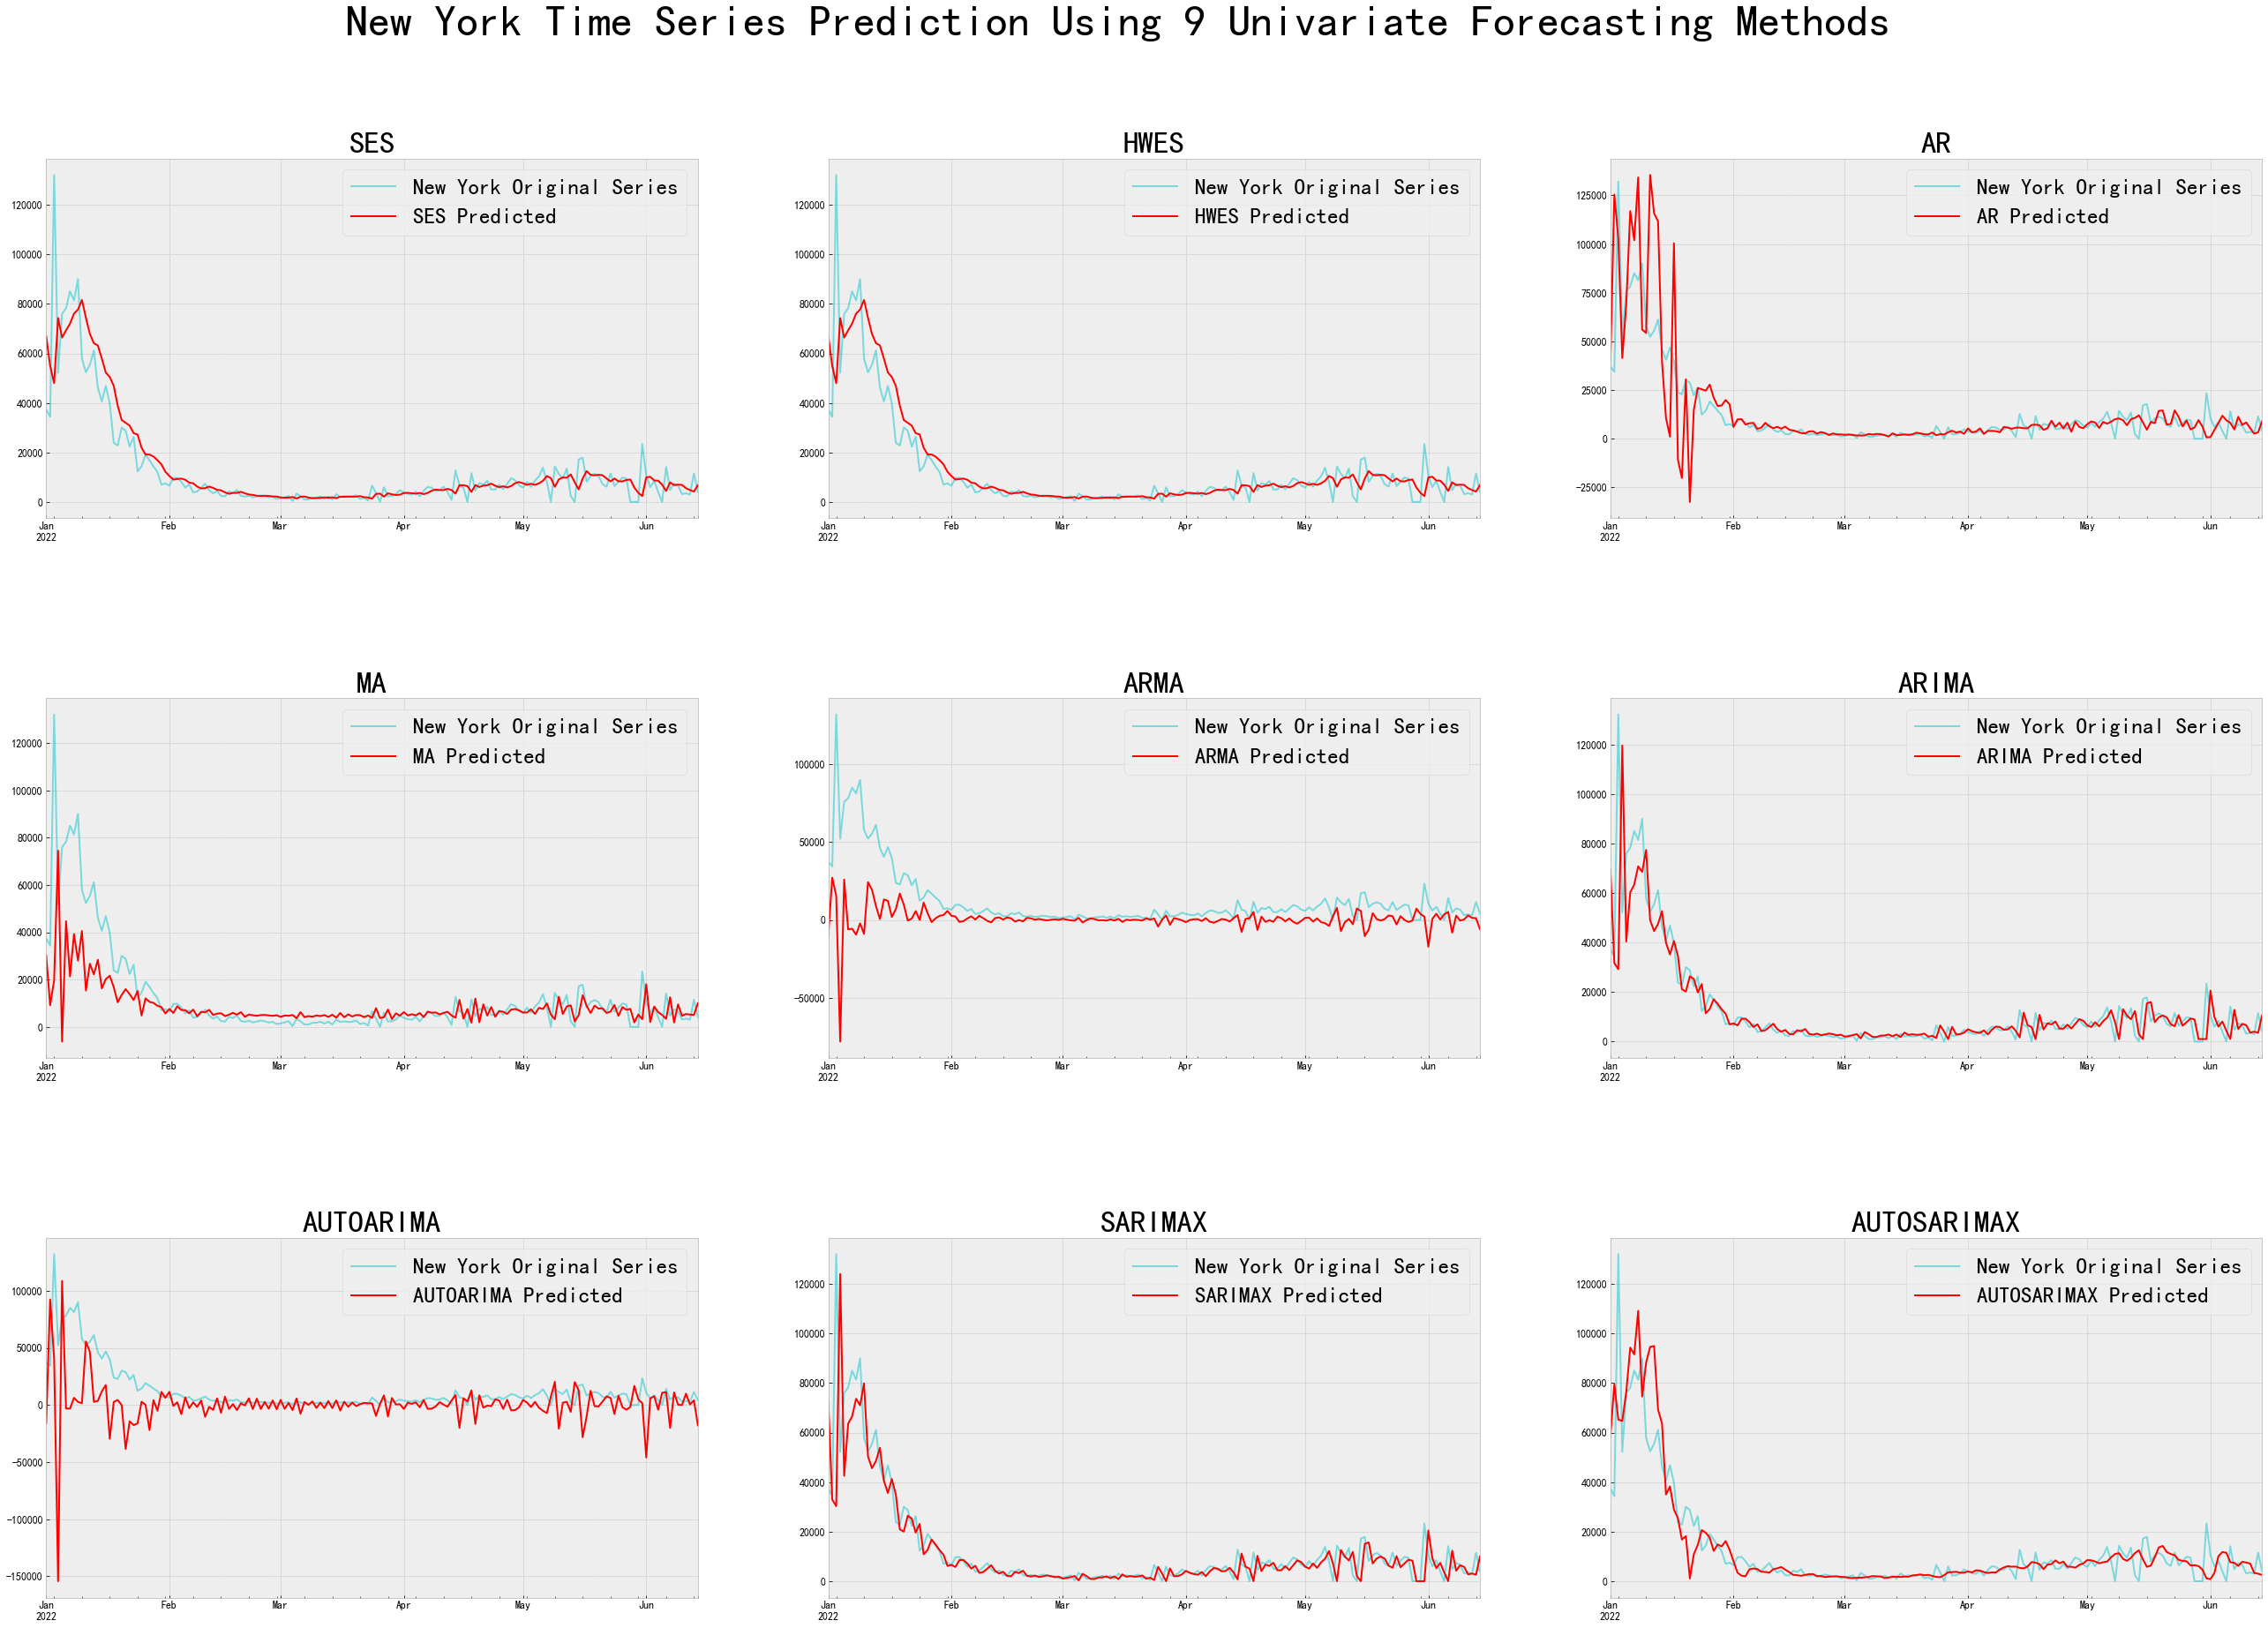

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(3*15, 10*3))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("New York Time Series Prediction Using 9 Univariate Forecasting Methods", fontsize=50, y = .96)
for yhat_key,ax in zip(yhat_dict.keys(), axs.ravel()):
    df_test['New York'].plot(ax=ax,alpha = .5, label = "New York Original Series", color = '#06c3cc')
    yhat_dict[yhat_key].plot(ax=ax,color = 'red',label=f'{yhat_key} Predicted')
    ax.set_title(f"{yhat_key.upper()}",fontsize = 35)
    ax.legend(fontsize = 25)
    ax.set_xlabel("")
plt.show()